In [1]:
import numpy as np
import sqlite3
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
fake_news = pd.read_csv("1mio-raw.csv/1mio-raw.csv", delimiter = ',', encoding="utf-8")

c:\Users\jakob\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
wikinews = pd.read_csv("wikinewsdata.csv")

In [53]:
wikinews.rename(columns = {'Content':'content', 'Title':'title'}, inplace = True)

print(fake_news.keys(),"\n", wikinews.keys())

Index(['Unnamed: 0', 'id', 'domain', 'type', 'url', 'content', 'scraped_at',
       'inserted_at', 'updated_at', 'title', 'authors', 'keywords',
       'meta_keywords', 'meta_description', 'tags', 'summary', 'source'],
      dtype='object') 
 Index(['Unnamed: 0', 'title', 'Link', 'Date', 'content', 'Sources'], dtype='object')


In [103]:
# Content
# Title
fake = len(fake_news[fake_news["type"] == "fake"]) + len(fake_news[fake_news["type"] == "conspiracy"]) +  len(fake_news[fake_news["type"] == "junksci"]) 
reliable = len(fake_news[fake_news["type"] == "reliable"]) + len(fake_news[fake_news["type"] == "political"])
print("fake",fake,"reliable",reliable )

fake 251130 reliable 296267


In [110]:
len(fake_news[fake_news["type"] == "reliable"])

6601

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


In [104]:
fake_df = fake_news[(fake_news["type"] == "fake") | (fake_news["type"] == "conspiracy") | (fake_news["type"] == "junksci")]
fake_df["label"] = np.ones(len(fake_df)).astype(int)

c:\Users\jakob\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [105]:
real_df = fake_news[(fake_news["type"] == "reliable") | (fake_news["type"] == "political")]
real_df["label"] = np.zeros(len(real_df)).astype(int)

c:\Users\jakob\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [122]:
all_dat = pd.merge(real_df[['content','title','label','meta_description', "meta_keywords"]], fake_df[['content','title','label', "meta_keywords", "meta_description"]], how = "outer")

all_dat = all_dat.sample(frac=1).reset_index(drop=True)


In [125]:
Train, Test = train_test_split(all_dat, test_size = 1/3)

In [127]:

len(Test)/len(Train)

0.5000013701220231

In [128]:
Train.to_csv("train_data.csv")
Test.to_csv("test_data.csv")

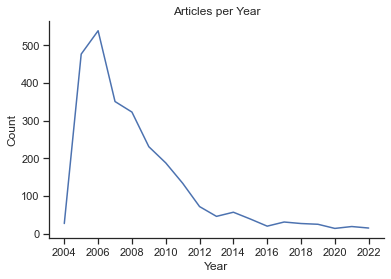

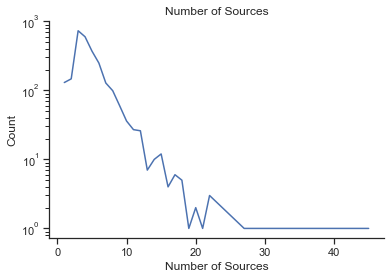

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "ticks")

con = sqlite3.connect('wikinews.db')

# wikinews.to_sql("wikinews", con)

# cur = con.cursor()

ns, dates = [], []

for row in cur.execute('SELECT COUNT(Title), SUBSTRING(Date, -6, 4) FROM wikinews GROUP BY SUBSTRING(Date, -6, 4) ORDER BY SUBSTRING(Date, -6, 4) asc'):
    n, date = row
    try:
        dates.append(int(date))
        ns.append(n)
    except:
        pass


plt.plot(dates, ns)
plt.xticks([2004 + i*2 for i in range(10)])
sns.despine()
# plt.title("")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Articles per Year")
plt.show()

counts, sources = [], [] 
for row in cur.execute("SELECT count(*), length(Sources) - length(replace(Sources, 'xa0', 'xa')) + 1 FROM wikinews GROUP BY length(Sources) - length(replace(Sources, 'xa0', 'xa'))"):
    c,s = row

    counts.append(c)
    sources.append(s)
    # print(row)

plt.plot(sources,counts)
sns.despine()
plt.xlabel("Number of Sources")
plt.ylabel("Count")
plt.yscale("log")
plt.title("Number of Sources")
plt.show()